# Laser Cutting Sandbox

## Objective


## Test Setup

- CSI3010SW @ 31.6V

# Code:

In [18]:
import GCode
import GRBL
import numpy as np
from uuid import uuid4
import os
import sys

sys.path.append("..")
from utils import picture

In [19]:
cnc = GRBL.GRBL(port="/dev/cnc_3018")

print("Laser Mode: {}".format(cnc.laser_mode))

def init(feed = 20):
    program = GCode.GCode()
    program.G21() # Metric Units
    program.G91() # Relative positioning.
    program.G1(F=feed) 
    return program

def end():
    program = GCode.GCode()
    return program

Laser Mode: 0.0


In [20]:
cnc.status

'<Idle|MPos:122.696,40.173,-31.500|Bf:15,127|FS:0,0|Ov:100,100,100>'

In [12]:
def test_program(feed=100, dZ=0):
    prog=GCode.GCode()
    prog.M3(S=1000)
    side_length=10
    prog.G1(Z=-dZ, F=25)
    prog.G1(X=side_length, F=feed)
    prog.G1(Y=side_length, F=feed)
    prog.G1(X=-side_length, F=feed)
    prog.G1(Y=-side_length, F=feed)
    #prog.G1(Z=dZ, F=25)
    prog.M3(S=0)
    prog.M5()
    return prog

In [21]:
init()

<GCode>[cmds=3]

In [22]:
test_program()

<GCode>[cmds=8]

In [23]:
cnc.run(init())

0.31171369552612305

In [24]:
cnc.run(test_program())

25.46993589401245

In [ ]:
dZ=0
test_program

In [17]:
for dZ in np.arange(0.1,2.5,0.1):
    cnc.run(test_program(feed=10, dZ=dZ))

In [1]:
cnc.reset()

NameError: name 'cnc' is not defined

In [ ]:
cnc.cmd("M5")

In [47]:
cnc.run(test_program(feed=100, dZ=1.5))

43.04782295227051

In [57]:
cnc.cmd("G0 Z1")

['ok', 'ok']

In [58]:
cnc.cmd("G0 Y15")

['ok', 'ok']

In [59]:
cnc.cmd("G0 Z-1")

['ok', 'ok']

In [33]:
cnc.cmd("G1")

[]

Achivement unlocked: Crashing the tool into the table.

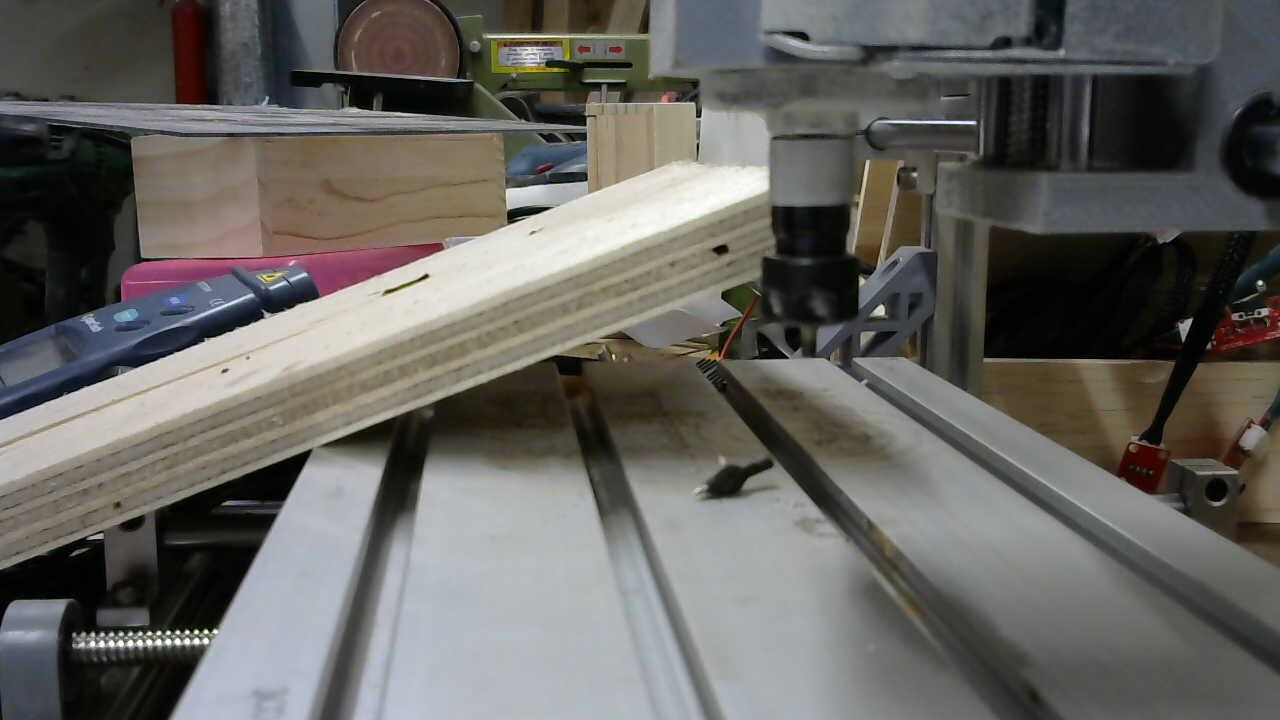

In [27]:
picture()

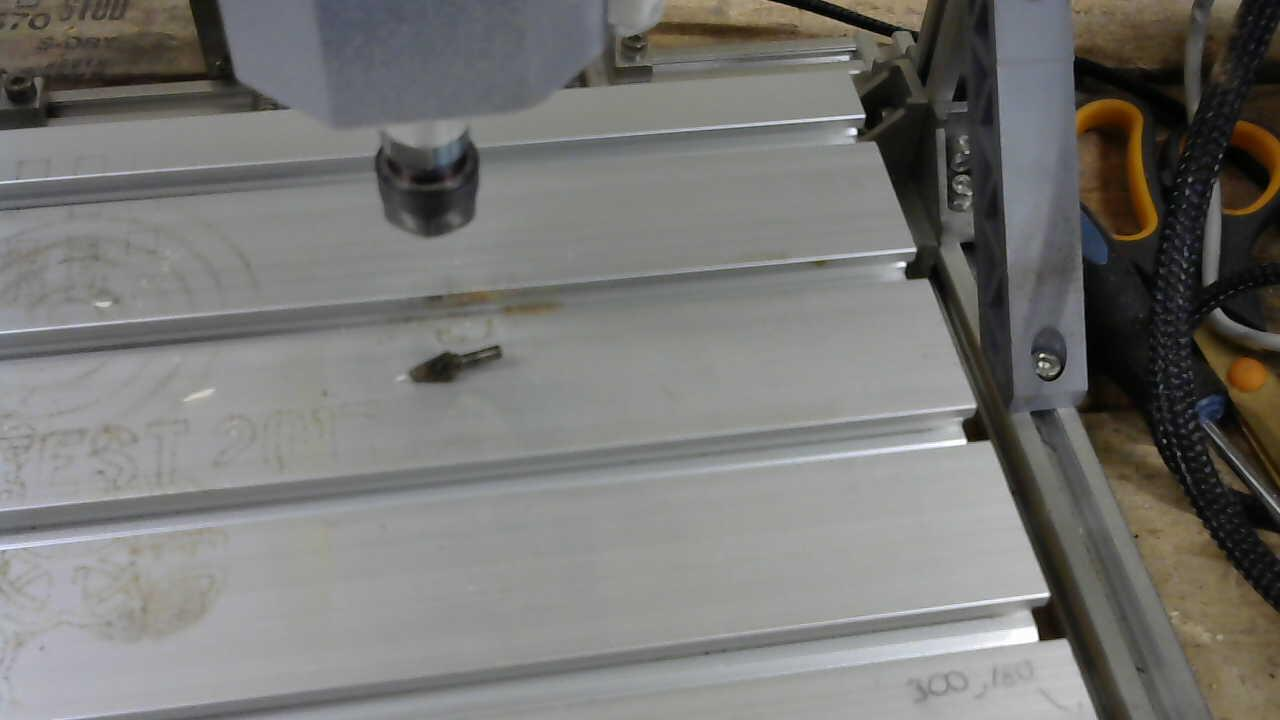

In [30]:
picture()